In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

In [3]:
cebuano_dataset = pd.read_csv('/content/drive/MyDrive/Cebuano Dataset/v3/Cebuano_Combined_Ling+BERT_v3.csv')

In [4]:
print('Shape of Features', cebuano_dataset.shape)
cebuano_dataset.head(5)

Shape of Features (284, 783)


,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density,unique_words,word_count,sentence_count,...,760,761,762,763,764,765,766,767,768,label
0,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571,31,56,9,...,0.119,-0.0459,-0.827,0.234,-0.198,0.1030,-0.107000,0.1910,-0.214,1
1,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000,37,56,10,...,0.279,-0.1430,-0.543,0.204,-0.237,0.1960,-0.023200,0.0792,-0.243,1
2,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714,29,35,7,...,0.137,0.0176,-0.580,0.313,-0.150,-0.0566,-0.024700,0.1390,-0.215,1
3,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000,50,65,17,...,0.236,-0.2090,-0.578,0.276,-0.127,-0.1300,0.171000,0.0883,-0.238,1
4,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286,62,105,17,...,0.169,-0.1230,-0.874,0.431,-0.329,0.0300,0.000401,0.2660,-0.236,1


In [5]:
y = cebuano_dataset['label']
X = cebuano_dataset.drop('label', axis=1)

X.head()

,consonant_cluster_density,v_density,cv_density,vc_density,cvc_density,ccv_density,ccvc_density,unique_words,word_count,sentence_count,...,759,760,761,762,763,764,765,766,767,768
0,0.410714,1.714286,1.267857,1.250000,0.571429,0.267857,0.178571,31,56,9,...,-0.060300,0.119,-0.0459,-0.827,0.234,-0.198,0.1030,-0.107000,0.1910,-0.214
1,0.303571,2.196429,1.696429,1.553571,0.821429,0.160714,0.125000,37,56,10,...,0.091700,0.279,-0.1430,-0.543,0.204,-0.237,0.1960,-0.023200,0.0792,-0.243
2,0.342857,1.628571,1.171429,1.057143,0.485714,0.200000,0.085714,29,35,7,...,0.024200,0.137,0.0176,-0.580,0.313,-0.150,-0.0566,-0.024700,0.1390,-0.215
3,0.400000,2.353846,1.876923,1.892308,1.030769,0.261538,0.200000,50,65,17,...,0.000918,0.236,-0.2090,-0.578,0.276,-0.127,-0.1300,0.171000,0.0883,-0.238
4,0.304762,1.733333,1.266667,1.085714,0.476190,0.209524,0.114286,62,105,17,...,0.221000,0.169,-0.1230,-0.874,0.431,-0.329,0.0300,0.000401,0.2660,-0.236


## Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split
X = cebuano_dataset[['consonant_cluster_density','v_density','cv_density','vc_density','cvc_density','ccv_density','ccvc_density','unique_words','word_count','sentence_count','average_word_len','average_sentence_len','average_syllable_count','polysyll_count','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249','250','251','252','253','254','255','256','257','258','259','260','261','262','263','264','265','266','267','268','269','270','271','272','273','274','275','276','277','278','279','280','281','282','283','284','285','286','287','288','289','290','291','292','293','294','295','296','297','298','299','300','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','319','320','321','322','323','324','325','326','327','328','329','330','331','332','333','334','335','336','337','338','339','340','341','342','343','344','345','346','347','348','349','350','351','352','353','354','355','356','357','358','359','360','361','362','363','364','365','366','367','368','369','370','371','372','373','374','375','376','377','378','379','380','381','382','383','384','385','386','387','388','389','390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','491','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','551','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','611','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','630','631','632','633','634','635','636','637','638','639','640','641','642','643','644','645','646','647','648','649','650','651','652','653','654','655','656','657','658','659','660','661','662','663','664','665','666','667','668','669','670','671','672','673','674','675','676','677','678','679','680','681','682','683','684','685','686','687','688','689','690','691','692','693','694','695','696','697','698','699','700','701','702','703','704','705','706','707','708','709','710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739','740','741','742','743','744','745','746','747','748','749','750','751','752','753','754','755','756','757','758','759','760','761','762','763','764','765','766','767','768']]
y = cebuano_dataset[['label']] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=20)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=3))

[[14  3  2]
 [ 1 14  3]
 [ 0  4 16]]
              precision    recall  f1-score   support

           1      0.933     0.737     0.824        19
           2      0.667     0.778     0.718        18
           3      0.762     0.800     0.780        20

    accuracy                          0.772        57
   macro avg      0.787     0.772     0.774        57
weighted avg      0.789     0.772     0.775        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


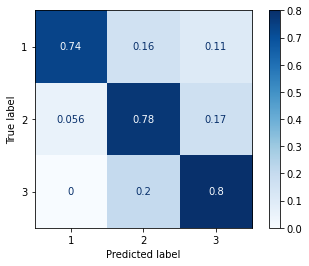

<Figure size 432x288 with 0 Axes>

In [11]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()


## Random Forest Hyperparmeter Tuning using GridSearchCV

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rfc_model= RandomForestClassifier()

parameters = {'n_estimators': [10,100,1000], 
              'max_features': [6,32,'auto'], 
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)
grid_search = grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)
rfc_best_params_= grid_search.best_params_

rfc_model.set_params(**grid_search.best_params_)
rfc_model.fit(X_train, y_train)

predictions = rfc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters:
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1000}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [13]:
grid_search = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[14  3  2]
 [ 1 14  3]
 [ 0  4 16]]
              precision    recall  f1-score   support

           1      0.938     0.789     0.857        19
           2      0.667     0.778     0.718        18
           3      0.800     0.800     0.800        20

    accuracy                          0.789        57
   macro avg      0.801     0.789     0.792        57
weighted avg      0.804     0.789     0.793        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


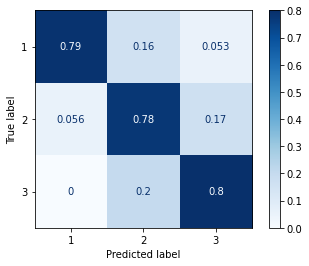

<Figure size 432x288 with 0 Axes>

In [14]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rfc_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

plt.tight_layout()